<a href="https://colab.research.google.com/github/vineethavijayn/vineethavijayn/blob/main/random_forest_regressor_gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Luminar_Projects/luminar_dataset/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
df.shape

(2290, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
#check for missing values
df.isna().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [22]:
#statistical measure of the dataset

df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
#dropping insignificant columns
df=df.drop('Date',axis=1)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

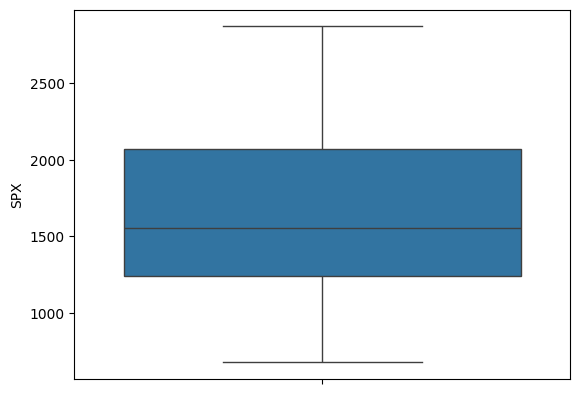

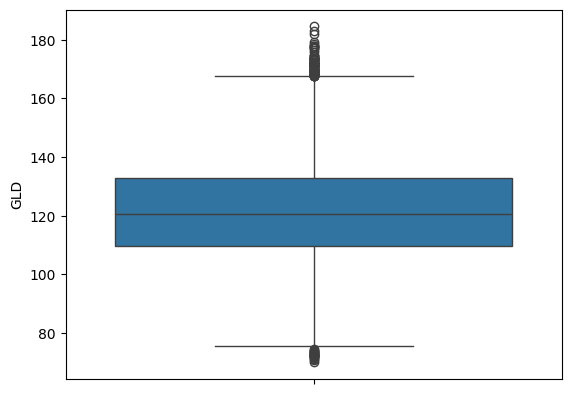

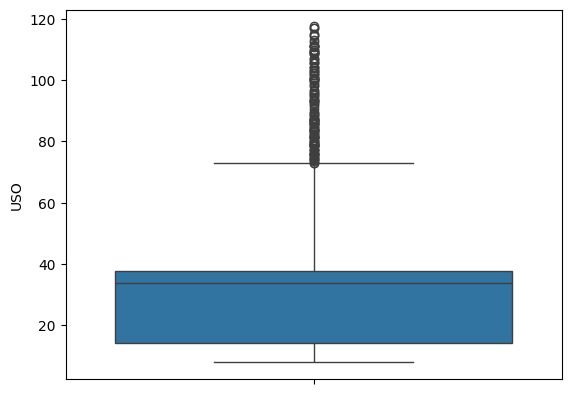

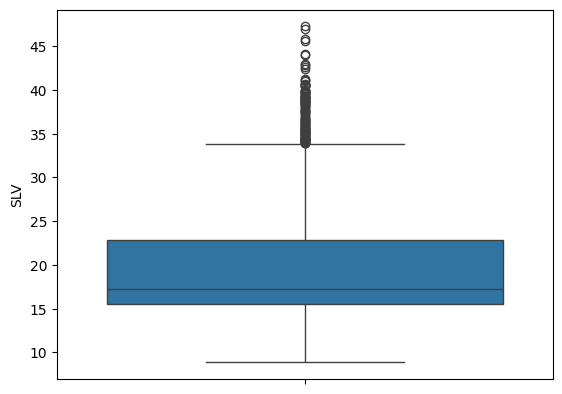

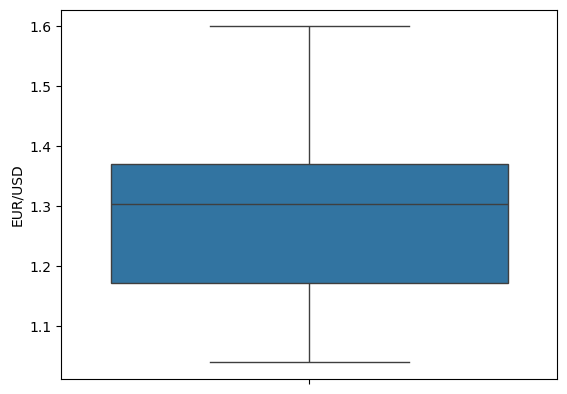

In [25]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
lst=['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']
for i in lst:
  sns.boxplot(data=df,y=i)
  plt.show()

In [26]:
#find correlation
correlation=df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

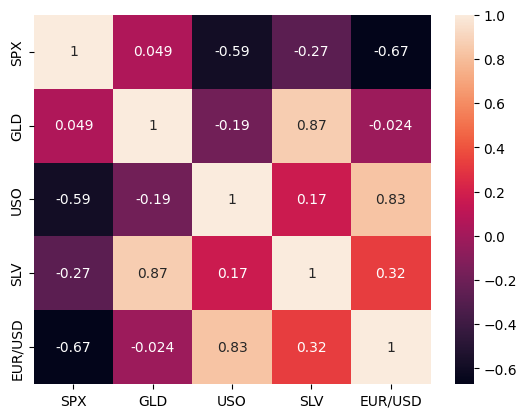

In [27]:
#correlation---- visualization using heatmap
import seaborn as sns
sns.heatmap(correlation,annot=True)

In [28]:
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


Text(0.5, 1.0, 'Distribution of Gold Price')

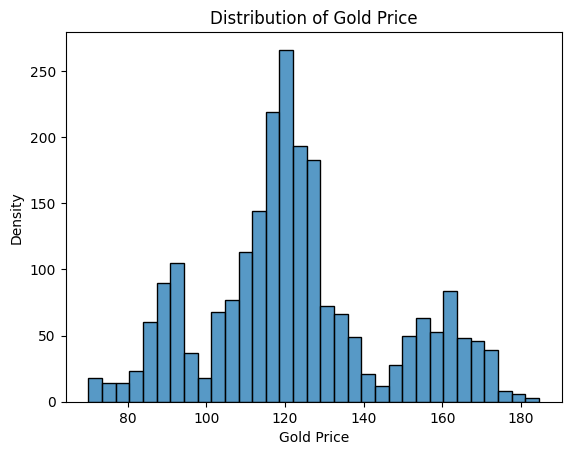

In [29]:
#visualise distribution of gold price
sns.histplot(df['GLD'])

import matplotlib.pyplot as plt
plt.xlabel('Gold Price')
plt.ylabel('Density')
plt.title('Distribution of Gold Price')

In [30]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [31]:
#split x and y
x=df.drop('GLD',axis=1)
y=df['GLD']

In [32]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [33]:
y.tail()

,GLD
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998
2289,122.543800


In [34]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
#random forest regression model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([122.47699943, 130.18330307, 127.48969962,  97.78999918,
       119.16899996, 114.64769908, 124.94920112, 117.83629986,
       107.81320131,  99.30059922,  95.44279961, 167.70629838,
       146.84120077, 116.37210065, 170.79830178,  85.30509932,
       124.35939912, 109.06379728, 112.10220064, 131.52380303,
       124.1368993 , 113.56180049, 115.95440047, 108.71329973,
       107.71199954, 125.78829935, 119.61959952, 112.37659907,
       112.95180123, 126.20809902, 146.2934015 ,  89.24249977,
       167.78889923, 113.45819936, 108.52530077, 120.18280111,
       140.98009913, 161.35090129, 173.49209881, 153.15170138,
       119.6560005 , 111.14560079, 121.41019947, 113.64929966,
       122.15740017, 108.00800096,  88.20919893, 114.21789926,
       129.70790208, 117.68630088, 104.26679952, 129.67740255,
       107.24399797, 161.04090494, 131.70120077, 117.76749979,
       146.60690025, 136.89890155,  95.44890039, 124.69920134,
       114.31029945,  86.73930091, 104.29279875, 113.84

In [36]:
#r2 score, Mean absolute percentage error
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MAPE", mean_absolute_percentage_error(y_test,y_pred))

R2 SCORE:  0.9904812946221523
MAPE 0.010978211372538151


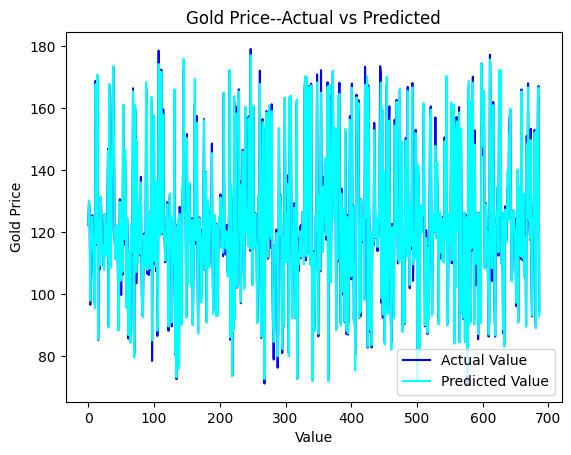

In [37]:
#plot actual vs predicted graph
y_list=list(y_test)
plt.plot(y_list, color='blue', label = 'Actual Value')
plt.plot(y_pred,color='cyan',label='Predicted Value')
plt.title('Gold Price--Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Gold Price')
plt.legend()